## 1. Import Necessasary libraries

In [1]:
import pandas as pd

## 2. Import dataset

In [2]:
from sklearn.datasets import load_breast_cancer
cancer_data = load_breast_cancer()

In [3]:
cancer_data_df = pd.DataFrame(cancer_data.data,columns=cancer_data.feature_names)
cancer_data_df['target'] = cancer_data.target
cancer_data_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [82]:
cancer_data_df.corr().round(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
mean radius,1.00,0.32,1.00,0.99,0.17,0.51,0.68,0.82,0.15,-0.31,...,0.30,0.97,0.94,0.12,0.41,0.53,0.74,0.16,0.01,-0.73
mean texture,0.32,1.00,0.33,0.32,-0.02,0.24,0.30,0.29,0.07,-0.08,...,0.91,0.36,0.34,0.08,0.28,0.30,0.30,0.11,0.12,-0.42
mean perimeter,1.00,0.33,1.00,0.99,0.21,0.56,0.72,0.85,0.18,-0.26,...,0.30,0.97,0.94,0.15,0.46,0.56,0.77,0.19,0.05,-0.74
mean area,0.99,0.32,0.99,1.00,0.18,0.50,0.69,0.82,0.15,-0.28,...,0.29,0.96,0.96,0.12,0.39,0.51,0.72,0.14,0.00,-0.71
mean smoothness,0.17,-0.02,0.21,0.18,1.00,0.66,0.52,0.55,0.56,0.58,...,0.04,0.24,0.21,0.81,0.47,0.43,0.50,0.39,0.50,-0.36
mean compactness,0.51,0.24,0.56,0.50,0.66,1.00,0.88,0.83,0.60,0.57,...,0.25,0.59,0.51,0.57,0.87,0.82,0.82,0.51,0.69,-0.60
mean concavity,0.68,0.30,0.72,0.69,0.52,0.88,1.00,0.92,0.50,0.34,...,0.30,0.73,0.68,0.45,0.75,0.88,0.86,0.41,0.51,-0.70
mean concave points,0.82,0.29,0.85,0.82,0.55,0.83,0.92,1.00,0.46,0.17,...,0.29,0.86,0.81,0.45,0.67,0.75,0.91,0.38,0.37,-0.78
mean symmetry,0.15,0.07,0.18,0.15,0.56,0.60,0.50,0.46,1.00,0.48,...,0.09,0.22,0.18,0.43,0.47,0.43,0.43,0.70,0.44,-0.33
mean fractal dimension,-0.31,-0.08,-0.26,-0.28,0.58,0.57,0.34,0.17,0.48,1.00,...,-0.05,-0.21,-0.23,0.50,0.46,0.35,0.18,0.33,0.77,0.01


### 3. Model Building

#### Before PCA

In [4]:
X = cancer_data_df.drop(labels=['target'],axis=1)
y = cancer_data_df[['target']]

In [5]:
X.shape,y.shape

((569, 30), (569, 1))

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=12,stratify=y)

In [8]:
X_train.shape,y_train.shape

((426, 30), (426, 1))

In [9]:
X_test.shape,y_train.shape

((143, 30), (426, 1))

### 4. Model Training

In [10]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

### 5. Model Testing || 6. Model Evaluation

#### Train data

In [12]:
y_pred_train = dt_model.predict(X_train)

from sklearn.metrics import accuracy_score,confusion_matrix
print('Accuracy Score :',accuracy_score(y_train,y_pred_train))
print('Confusion Matrix:\n',confusion_matrix(y_train,y_pred_train))

Accuracy Score : 1.0
Confusion Matrix:
 [[159   0]
 [  0 267]]


#### Test data

In [13]:
y_pred_test = dt_model.predict(X_test)

from sklearn.metrics import accuracy_score,confusion_matrix
print('Accuracy Score :',accuracy_score(y_test,y_pred_test))
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred_test))

Accuracy Score : 0.8881118881118881
Confusion Matrix:
 [[45  8]
 [ 8 82]]


# AFTER PCA

In [41]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
X_scaled = std_scaler.fit_transform(X)
X_scaled

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [68]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_transformed = pca.fit_transform(X_scaled)

In [69]:
variance = pca.explained_variance_ratio_
variance

array([0.44272026, 0.18971182])

In [70]:
import numpy as np
np.cumsum(np.round(a = variance,decimals=4)*100)

array([44.27, 63.24])

In [43]:
X_transformed.shape

(569, 2)

In [44]:
X_transformed_df = pd.DataFrame(data=X_transformed, columns = ['PC1','PC2'])
X_transformed_df

,PC1,PC2
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072
...,...,...
564,6.439315,-3.576817
565,3.793382,-3.584048
566,1.256179,-1.902297
567,10.374794,1.672010


In [45]:
from sklearn.model_selection import train_test_split
X_train_pca,X_test_pca,y_train,y_test = train_test_split(X_transformed_df,y,random_state=12,stratify=y)

In [46]:
X_train_pca.shape,y_train.shape

((426, 2), (426, 1))

In [47]:
X_test_pca.shape,y_train.shape

((143, 2), (426, 1))

### 4. Model Training

In [48]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_pca,y_train)

DecisionTreeClassifier()

### 5. Model Testing || 6. Model Evaluation

#### Train data

In [49]:
y_pred_train = dt_model.predict(X_train_pca)

from sklearn.metrics import accuracy_score,confusion_matrix
print('Accuracy Score :',accuracy_score(y_train,y_pred_train))
print('Confusion Matrix:\n',confusion_matrix(y_train,y_pred_train))

Accuracy Score : 1.0
Confusion Matrix:
 [[159   0]
 [  0 267]]


#### Test data

In [50]:
y_pred_test = dt_model.predict(X_test_pca)

from sklearn.metrics import accuracy_score,confusion_matrix
print('Accuracy Score :',accuracy_score(y_test,y_pred_test))
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred_test))

Accuracy Score : 0.8671328671328671
Confusion Matrix:
 [[47  6]
 [13 77]]


### To Understand PCA - Linear Algebra

* Eigen Value
* Eigen Vector 
* Covariance Matrix

### Visualization

In [75]:
X_train_pca

,PC1,PC2
245,-2.281318,2.077686
481,-2.481055,-2.363959
416,-2.622339,2.502102
503,7.259179,-5.495736
344,-2.176917,0.958911
...,...,...
256,6.392650,-1.823094
159,-4.680212,-1.103857
348,-3.326079,0.475172
466,-0.417664,0.116520


In [80]:
y_train

,target
245,1
481,1
416,1
503,0
344,1
...,...
256,0
159,1
348,1
466,1


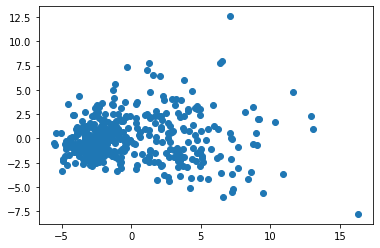

In [81]:
from matplotlib import pyplot as plt
plt.scatter(x = X_train_pca['PC1'],y = X_train_pca['PC2'])#,c =y_train)